In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/paimongoulart/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


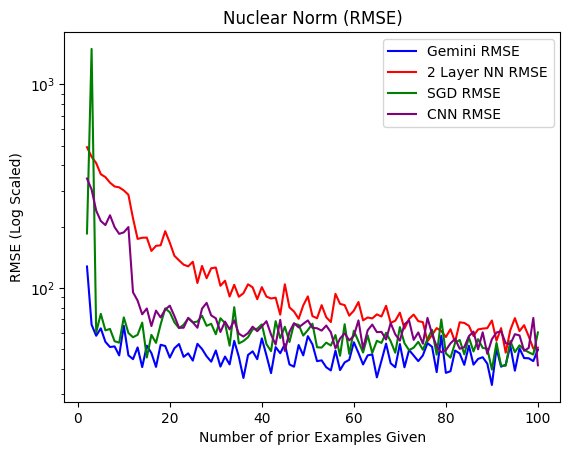

In [2]:
x_100 = range(2, 101)
LLM_nuclear_norm = pd.read_csv('5x5_Results/LLM_Results/LLM_results_Nuclear_Matrix_Norm_average_results.csv')
y = LLM_nuclear_norm['average_rmse']
sns.lineplot(x=x_100, y=y, color='blue', label='Gemini RMSE')

NN_nuclear_norm = pd.read_csv('5x5_Results/NN_Results/2NN_df_average_results_nuclear_norm.csv')
y = NN_nuclear_norm['average_rmse']
sns.lineplot(x=x_100, y=y, color='red', label='2 Layer NN RMSE')

SGD_nuclear_norm = pd.read_csv('5x5_Results/SGD_Results/SGD_df_average_results_nuclear_norm_sgd.csv')
y = SGD_nuclear_norm['average_rmse']
sns.lineplot(x=x_100, y=y, color='green', label='SGD RMSE')

CNN_nuclear_norm = pd.read_csv('5x5_Results/CNN_Results/CNN_df_average_results_nuclear_norm.csv')
y = CNN_nuclear_norm['average_rmse']
sns.lineplot(x=x_100, y=y, color='purple', label='CNN RMSE')

plt.yscale('log')
plt.xlabel('Number of prior Examples Given')
plt.ylabel('RMSE (Log Scaled)')
plt.title('Nuclear Norm (RMSE)')
plt.legend(loc='upper right')
plt.savefig('RMSE_Nuclear_Norm_All_Models.pdf', format='pdf', dpi=100)
plt.show()


In [3]:
import pandas as pd

# Load data for each model
gemini_df = pd.read_csv('5x5_Results/LLM_Results/LLM_results_Nuclear_Matrix_Norm_average_results.csv')
nn_df = pd.read_csv('5x5_Results/NN_Results/2NN_df_average_results_nuclear_norm.csv')
sgd_df = pd.read_csv('5x5_Results/SGD_Results/SGD_df_average_results_nuclear_norm_sgd.csv')
cnn_df = pd.read_csv('5x5_Results/CNN_Results/CNN_df_average_results_nuclear_norm.csv')

# Select the last 25 experiments and calculate the average RMSE
avg_gemini_rmse = gemini_df['average_rmse'].iloc[-25:].mean()
avg_nn_rmse = nn_df['average_rmse'].iloc[-25:].mean()
avg_sgd_rmse = sgd_df['average_rmse'].iloc[-25:].mean()
avg_cnn_rmse = cnn_df['average_rmse'].iloc[-25:].mean()

# Create summary table
summary_table = pd.DataFrame({
    'Model': ['Gemini', '2 Layer NN', 'SGD', 'CNN'],
    'Average RMSE (Last 25 Trials)': [avg_gemini_rmse, avg_nn_rmse, avg_sgd_rmse, avg_cnn_rmse]
})

# Display the table
print("Average RMSE from the Last 25 Experiments for Nuclear Norm for Each Model")
print(summary_table)

Average RMSE from the Last 25 Experiments for Nuclear Norm for Each Model
        Model  Average RMSE (Last 25 Trials)
0      Gemini                      45.517405
1  2 Layer NN                      60.635421
2         SGD                      51.442399
3         CNN                      55.336333


In [8]:
# Total average among all nuclear norm values
actual_average_per_experiment = []
LLM_predicted_average_per_experiment = []
two_layer_predicted_average_per_experiment = []
CNN_predicted_average_per_experiment = []
SGD_predicted_average_per_experiment = []

# Open CSVs that have data for each individual experiment
LLM_Every_Experiment = pd.read_csv('5x5_Results/LLM_Results/LLM_results_Nuclear_Matrix_Norm_experiment_results.csv')
two_layer_every_experiment = pd.read_csv('5x5_Results/NN_Results/2NN_df_experiment_results_nuclear_norm_2NN.csv')
CNN_every_experiment = pd.read_csv('5x5_Results/CNN_Results/CNN_df_experiment_results_nuclear_norm.csv')
SGD_every_experiment = pd.read_csv('5x5_Results/SGD_Results/SGD_df_experiment_results_nuclear_norm_sgd.csv')


LLM_17_Demonstrations = []
two_layer_Demonstrations = []
CNN_17_Demonstrations = []
SGD_17_Demonstrations = []
actual_17_Demonstrations = []

for i in range(2, 101):

    LLM_Predicted_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['predicted_answers']
    two_layer_predicted_list = two_layer_every_experiment[two_layer_every_experiment['i'] == i]['predicted_answers']
    CNN_predicted_list = CNN_every_experiment[CNN_every_experiment['i'] == i]['predicted_answers']
    SGD_predicted_list = SGD_every_experiment[SGD_every_experiment['i'] == i]['predicted_answers']
    
    Actual_List = LLM_Every_Experiment[LLM_Every_Experiment['i'] == i]['actual_answers']

    nuclear_norm_values = []
    
    for j in LLM_Predicted_List:
        j = float(j[1:-1])  # Parsing the predicted nuclear norm value
        nuclear_norm_values.append(j)
        if(i == 17):
            LLM_17_Demonstrations.append(j)

    LLM_predicted_average_per_experiment.append(np.array(nuclear_norm_values).mean())

    # Process actual nuclear norm values
    nuclear_norm_values = []
    
    for j in Actual_List:
        j = float(j[1:-1])  # Parsing the actual nuclear norm value
        nuclear_norm_values.append(j)
        if(i == 17):
            actual_17_Demonstrations.append(j)
            
    actual_average_per_experiment.append(np.array(nuclear_norm_values).mean())

    # Process two-layer predicted nuclear norm values
    nuclear_norm_values = []
    
    for j in two_layer_predicted_list:
        j = float(j)
        nuclear_norm_values.append(j)
        if(i == 17):
            two_layer_Demonstrations.append(j)
            
    two_layer_predicted_average_per_experiment.append(np.array(nuclear_norm_values).mean())

    # Process CNN predicted nuclear norm values
    nuclear_norm_values = []
    
    for j in CNN_predicted_list:
        j = float(j)
        nuclear_norm_values.append(j)
        if(i == 17):
            CNN_17_Demonstrations.append(j)

    CNN_predicted_average_per_experiment.append(np.array(nuclear_norm_values).mean())

    # Process SGD predicted nuclear norm values
    nuclear_norm_values = []
    
    for j in SGD_predicted_list:
        j = float(j)
        nuclear_norm_values.append(j)
        if(i == 17):
            SGD_17_Demonstrations.append(j)

    SGD_predicted_average_per_experiment.append(np.array(nuclear_norm_values).mean())


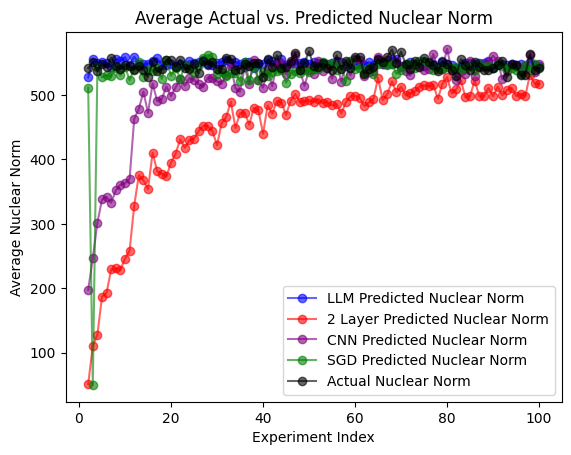

In [9]:
x_values = range(2, 101)  

plt.plot(x_values, LLM_predicted_average_per_experiment, label='LLM Predicted Nuclear Norm', color='blue', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_values, two_layer_predicted_average_per_experiment, label='2 Layer Predicted Nuclear Norm', color='red', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_values, CNN_predicted_average_per_experiment, label='CNN Predicted Nuclear Norm', color='purple', linestyle='-', marker='o', alpha=0.6)
plt.plot(x_values, SGD_predicted_average_per_experiment, label='SGD Predicted Nuclear Norm', color='green', linestyle='-', marker='o', alpha=0.6)

plt.plot(x_values, actual_average_per_experiment, label='Actual Nuclear Norm', color='black', linestyle='-', marker='o', alpha=0.6)

plt.xlabel('Experiment Index')
plt.ylabel('Average Nuclear Norm')
plt.title('Average Actual vs. Predicted Nuclear Norm')

plt.legend()
#plt.savefig('Nuclear_Average_All_Examples.pdf', format='pdf', dpi=100)
plt.show()


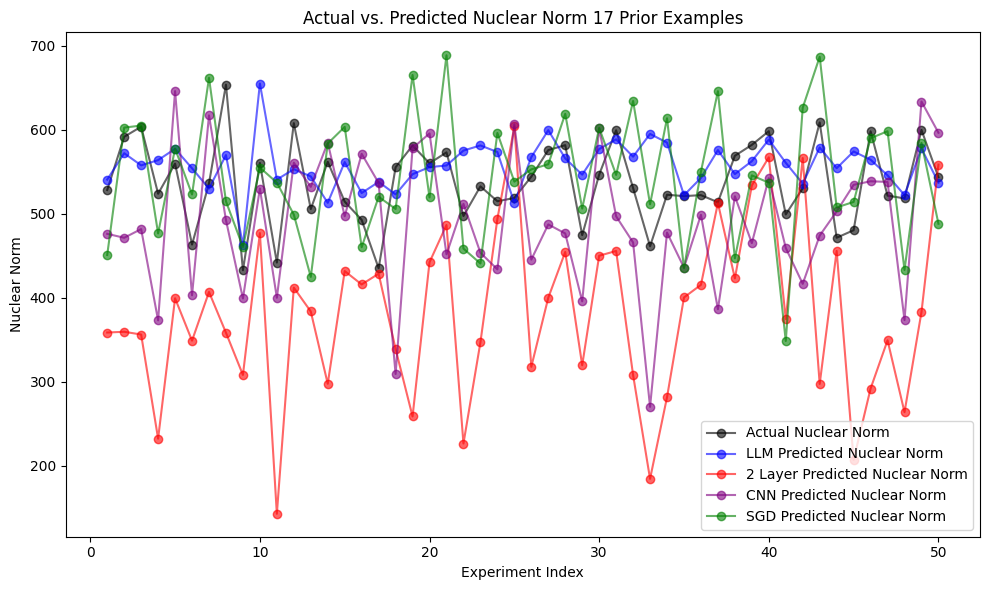

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Single plot for all experiments

x_axis_experiments = range(1, 51)  # 50 experiments

# Plot all the data from the 50 experiments for the nuclear norm
actual_values = actual_17_Demonstrations
LLM_values = LLM_17_Demonstrations
two_layer_values = two_layer_Demonstrations
CNN_values = CNN_17_Demonstrations
SGD_values = SGD_17_Demonstrations

# Plotting the values for the 50 experiments
axs.plot(x_axis_experiments, actual_values, label='Actual Nuclear Norm', color='black', linestyle='-', marker='o', alpha=0.6)
axs.plot(x_axis_experiments, LLM_values, label='LLM Predicted Nuclear Norm', color='blue', linestyle='-', marker='o', alpha=0.6)
axs.plot(x_axis_experiments, two_layer_values, label='2 Layer Predicted Nuclear Norm', color='red', linestyle='-', marker='o', alpha=0.6)
axs.plot(x_axis_experiments, CNN_values, label='CNN Predicted Nuclear Norm', color='purple', linestyle='-', marker='o', alpha=0.6)
axs.plot(x_axis_experiments, SGD_values, label='SGD Predicted Nuclear Norm', color='green', linestyle='-', marker='o', alpha=0.6)

axs.set_xlabel('Experiment Index')
axs.set_ylabel('Nuclear Norm')
axs.set_title('Actual vs. Predicted Nuclear Norm 17 Prior Examples')
axs.legend()

plt.tight_layout()
#plt.savefig('nuclear_norm_experiments.pdf', format='pdf', dpi=100)
plt.show()


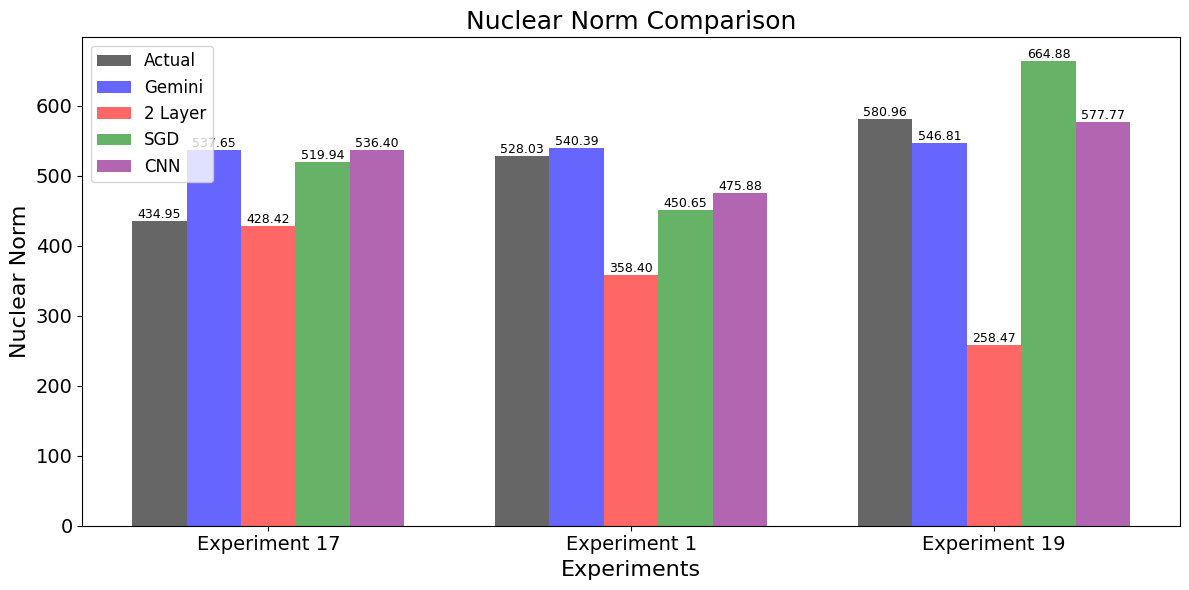

In [11]:
import matplotlib.pyplot as plt
import random
import numpy as np

random_experiments = random.sample(range(len(actual_17_Demonstrations)), 3)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

categories = ['Actual', 'Gemini', '2 Layer', 'SGD', 'CNN']
colors = ['black', 'blue', 'red', 'green', 'purple']
num_categories = len(categories)

bar_width = 0.15
x_indexes = np.arange(len(random_experiments))  

for i, (category, color) in enumerate(zip(categories, colors)):
    values = [
        np.mean(actual_17_Demonstrations[exp]) if category == 'Actual' else
        np.mean(LLM_17_Demonstrations[exp]) if category == 'Gemini' else
        np.mean(two_layer_Demonstrations[exp]) if category == '2 Layer' else
        np.mean(SGD_17_Demonstrations[exp]) if category == 'SGD' else
        np.mean(CNN_17_Demonstrations[exp])  # Adding CNN here
        for exp in random_experiments
    ]
    
    bar_positions = x_indexes + i * bar_width
    bars = ax.bar(bar_positions, values, width=bar_width, label=category, color=color, alpha=0.6)
    
    for bar, value in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height(), 
            f'{value:.2f}', 
            ha='center', va='bottom', fontsize=9  
        )

ax.set_xticks(x_indexes + bar_width * (num_categories - 1) / 2)
ax.set_xticklabels([f'Experiment {exp+1}' for exp in random_experiments])

ax.set_xlabel('Experiments', fontsize=16)
ax.set_ylabel('Nuclear Norm', fontsize=16)
ax.set_title('Nuclear Norm Comparison', fontsize=18)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('Nuclear_Norm_Bar_Charts.pdf', format='pdf', dpi=100)
plt.show()
